# K Nearest Neighbors

In this notebook I will build a K means clustering algorithm from scratch.

In [55]:
# Linear algebra
import numpy as np
# Plotting the data
import matplotlib.pyplot as plt
import seaborn as sns
# Creating data
from sklearn.datasets import make_blobs
# Scaling the data
from sklearn.preprocessing import StandardScaler
# For selecting a random starting point
import random


## Making some Synthetic data

<function matplotlib.pyplot.show(close=None, block=None)>

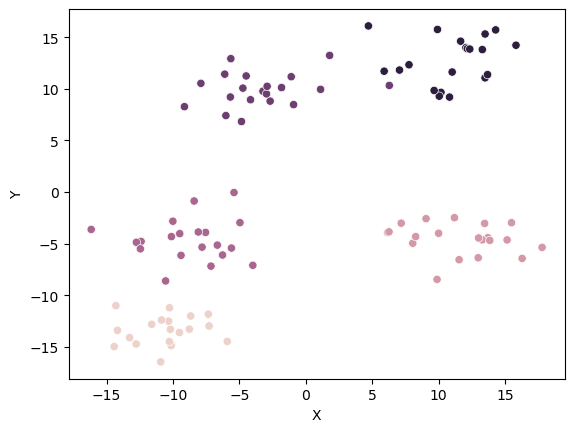

In [56]:
Centers = 5 

# Using make blobs to make some synthetic data. # everything below works in more than 2 dimentions, but the plots are easiest
# to look at in 2.

n_features = 2

x_train, y_train = make_blobs(n_samples = 100,n_features =n_features ,centers = Centers , random_state= 40)

# It might be tempting to keep the distances at the usual standard scalar, however scaling everything by 10 greatly helps
# given that later we use standard deviation to decide on the best attempt so far, using larger numbers makes points futher
# away hurt even more. 

scalar = 10
x_train = StandardScaler().fit_transform(x_train) * scalar

# Plotting the data

sns.scatterplot(x=[X[0] for X in x_train],
                y=[X[1] for X in x_train],
                hue = y_train, 
                legend = None)
plt.xlabel('X')
plt.ylabel('Y')
plt.show

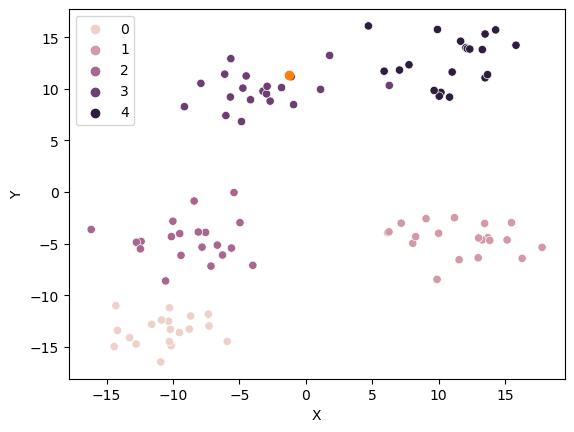

In [81]:
# We also need a new point to be classified, this point will be picked at random.
# As we can see from the plot below it is around the 3 cluster, so we would hope
# that it will output 3

random.seed(40)

new_data = [random.uniform(-15,15) for n in range(n_features) ]

sns.scatterplot(x=[X[0] for X in x_train],
                y=[X[1] for X in x_train],
                hue = y_train, )
plt.xlabel('X')
plt.ylabel('Y') 
plt.scatter(x=new_data[0],
            y=new_data[1])
plt.show()

In [58]:
def distance(point, data):
    # Taking the standard euclidian distance for the distance between a point and our data
    return np.sqrt(np.sum((point-data)**2,axis=1 ))

In [79]:
class KNN:
    
    # Pulling in the classifier with a default number of neighbors of 3
    def __init__(self,neighbors=3):
        self.neighbors = neighbors
        
    # Finding the nearest neighbors 
    
    def find_nearest_neighbors(self,new_data,x_train,y_train):
        
        # working out distances from the point to the rest of the data
        distances = distance(new_data, x_train)
        
        # putting the labels and distances in one array
        dist_and_labels = np.concatenate((distances.reshape(-1,1),y_train.reshape(-1,1)),axis=1)
        
        # Sorting the array and thus the labels by distances
        sorted_dist_and_labels = dist_and_labels[dist_and_labels[:,0].argsort()]
        
        # Taking just the K nearest neighbors
        nearest_neighbors_labels = sorted_dist_and_labels[0:self.neighbors,1].tolist()
        
        # Returning the most frequent element in the collection of K nearest neighbors. 
        return max(set(nearest_neighbors_labels), key = nearest_neighbors_labels.count)

In [80]:
Classifier = KNN(5)

# As expected. 
print(Classifier.find_nearest_neighbors(new_data= new_data,x_train= x_train,y_train = y_train))

[3.0, 3.0, 3.0, 3.0, 3.0]
3.0
